### trial

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('top_100_genes.csv')

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('top_10_genes.csv')

print(f'Top 100 genes saved to top_100_genes.csv')
print(f'Top 10 genes saved to top_10_genes.csv')


Top 100 genes saved to top_100_genes.csv
Top 10 genes saved to top_10_genes.csv


### random forest + SVM

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Random Forest classifier to find feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('RandomForesttop_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('RandomForesttop_10_genes.csv', index=False)

print(f'Top 100 genes saved to top_100_genes.csv')
print(f'Top 10 genes saved to top_10_genes.csv')

# Classification using SVM with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Classification Report for SVM using all features:")
print(classification_report(y_test, y_pred))

# Classification using SVM with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_100, y_train_100)
y_pred_100 = svm_clf.predict(X_test_100)
print("Classification Report for SVM using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using SVM with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_10, y_train_10)
y_pred_10 = svm_clf.predict(X_test_10)
print("Classification Report for SVM using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


Top 100 genes saved to top_100_genes.csv
Top 10 genes saved to top_10_genes.csv
Classification Report for SVM using all features:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Classification Report for SVM using top 100 features:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.82      0.90      0.86        10

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19

Classification Report for SVM using top 10 features:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9


### GradientBoosting + SVM

In [20]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Gradient Boosting classifier to find feature importances
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('GradientBoosting_top_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('GradientBoosting_top_10_genes.csv', index=False)

print(f'Top 100 genes saved to GradientBoosting_top_100_genes.csv')
print(f'Top 10 genes saved to GradientBoosting_top_10_genes.csv')

# Classification using SVM with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Classification Report for SVM using all features:")
print(classification_report(y_test, y_pred))

# Classification using SVM with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_100, y_train_100)
y_pred_100 = svm_clf.predict(X_test_100)
print("Classification Report for SVM using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using SVM with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_10, y_train_10)
y_pred_10 = svm_clf.predict(X_test_10)
print("Classification Report for SVM using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


Top 100 genes saved to GradientBoosting_top_100_genes.csv
Top 10 genes saved to GradientBoosting_top_10_genes.csv
Classification Report for SVM using all features:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Classification Report for SVM using top 100 features:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.67      0.60      0.63        10

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19

Classification Report for SVM using top 10 features:
              precision    recall  f1-score   support

           0       0

## Lasoo + SVM

In [21]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Lasso for feature selection
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)

# Get feature importances (absolute values of the coefficients)
importances = np.abs(lasso.coef_)

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('Lasso_top_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('Lasso_top_10_genes.csv', index=False)

print(f'Top 100 genes saved to Lasso_top_100_genes.csv')
print(f'Top 10 genes saved to Lasso_top_10_genes.csv')

# Classification using SVM with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Classification Report for SVM using all features:")
print(classification_report(y_test, y_pred))

# Classification using SVM with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_100, y_train_100)
y_pred_100 = svm_clf.predict(X_test_100)
print("Classification Report for SVM using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using SVM with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_10, y_train_10)
y_pred_10 = svm_clf.predict(X_test_10)
print("Classification Report for SVM using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.786e-02, tolerance: 1.548e-03
  model = cd_fast.enet_coordinate_descent(


Top 100 genes saved to Lasso_top_100_genes.csv
Top 10 genes saved to Lasso_top_10_genes.csv
Classification Report for SVM using all features:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Classification Report for SVM using top 100 features:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.62      0.80      0.70        10

    accuracy                           0.63        19
   macro avg       0.64      0.62      0.61        19
weighted avg       0.64      0.63      0.62        19

Classification Report for SVM using top 10 features:
              precision    recall  f1-score   support

           0       0.70      0.78      0.7

## ElasticNet + SVM

In [23]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Elastic Net for feature selection
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)

# Get feature importances (absolute values of the coefficients)
importances = np.abs(elastic_net.coef_)

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('ElasticNet_top_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('ElasticNet_top_10_genes.csv', index=False)

print(f'Top 100 genes saved to ElasticNet_top_100_genes.csv')
print(f'Top 10 genes saved to ElasticNet_top_10_genes.csv')

# Classification using SVM with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Classification Report for SVM using all features:")
print(classification_report(y_test, y_pred))

# Classification using SVM with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_100, y_train_100)
y_pred_100 = svm_clf.predict(X_test_100)
print("Classification Report for SVM using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using SVM with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_10, y_train_10)
y_pred_10 = svm_clf.predict(X_test_10)
print("Classification Report for SVM using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.814e-02, tolerance: 1.548e-03
  model = cd_fast.enet_coordinate_descent(


Top 100 genes saved to ElasticNet_top_100_genes.csv
Top 10 genes saved to ElasticNet_top_10_genes.csv
Classification Report for SVM using all features:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Classification Report for SVM using top 100 features:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.73      0.80      0.76        10

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19

Classification Report for SVM using top 10 features:
              precision    recall  f1-score   support

           0       0.60      0.6

In [25]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 7.9 MB/s eta 0:00:16
   ---------------------------------------- 0.8/124.9 MB 10.5 MB/s eta 0:00:12
   ---------------------------------------- 1.4/124.9 MB 10.0 MB/s eta 0:00:13
    --------------------------------------- 1.9/124.9 MB 10.9 MB/s eta 0:00:12
    --------------------------------------- 2.4/124.9 MB 11.0 MB/s eta 0:00:12
    --------------------------------------- 3.0/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 3.6/124.9 MB 10.9 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.6 MB/s eta 0:00:11
   - -------------------------------------- 4.8/124.9 MB 11.7 MB/s eta 0:00:11
   - -------------------------------------- 5.4/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 5.9/124.9 MB 11.5 MB/s eta 0:00:11
   -- ------------------------------------- 6.5/124.9 MB 11.6

## XGBOOSt+ SVM

In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use XGBoost classifier to find feature importances
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X, y)

# Get feature importances
importances = xgb_clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
top_100_genes_df.to_csv('XGBoost_top_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
top_10_genes_df.to_csv('XGBoost_top_10_genes.csv', index=False)

print(f'Top 100 genes saved to XGBoost_top_100_genes.csv')
print(f'Top 10 genes saved to XGBoost_top_10_genes.csv')

# Classification using SVM with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Classification Report for SVM using all features:")
print(classification_report(y_test, y_pred))

# Classification using SVM with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_100, y_train_100)
y_pred_100 = svm_clf.predict(X_test_100)
print("Classification Report for SVM using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using SVM with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

svm_clf.fit(X_train_10, y_train_10)
y_pred_10 = svm_clf.predict(X_test_10)
print("Classification Report for SVM using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


Top 100 genes saved to XGBoost_top_100_genes.csv
Top 10 genes saved to XGBoost_top_10_genes.csv
Classification Report for SVM using all features:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Classification Report for SVM using top 100 features:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.73      0.80      0.76        10

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19

Classification Report for SVM using top 10 features:
              precision    recall  f1-score   support

           0       0.75      1.00     

## Random forest and XGboos.

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Random Forest classifier to find feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

importance_scores_top_100 = importances[indices_top_100]
importance_scores_top_10 = importances[indices_top_10]

# Save the names and scores of top 100 genes to a CSV file
top_100_genes_df = pd.DataFrame({
    'Gene': selected_features_top_100,
    'Importance Score': importance_scores_top_100
})
##top_100_genes_df.to_csv('RandomForesttop_100_genes.csv', index=False)

# Save the names and scores of top 10 genes to a CSV file
top_10_genes_df = pd.DataFrame({
    'Gene': selected_features_top_10,
    'Importance Score': importance_scores_top_10
})
##top_10_genes_df.to_csv('RandomForesttop_10_genes.csv', index=False)

print(f'Top 100 genes saved to RandomForesttop_100_genes.csv')
print(f'Top 10 genes saved to RandomForesttop_10_genes.csv')

# Classification using Gradient Boosting with all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_clf.predict(X_test)
print("Classification Report for Gradient Boosting using all features:")
print(classification_report(y_test, y_pred))

# Classification using Gradient Boosting with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

gb_clf.fit(X_train_100, y_train_100)
y_pred_100 = gb_clf.predict(X_test_100)
print("Classification Report for Gradient Boosting using top 100 features:")
print(classification_report(y_test_100, y_pred_100))

# Classification using Gradient Boosting with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

gb_clf.fit(X_train_10, y_train_10)
y_pred_10 = gb_clf.predict(X_test_10)
print("Classification Report for Gradient Boosting using top 10 features:")
print(classification_report(y_test_10, y_pred_10))


Top 100 genes saved to RandomForesttop_100_genes.csv
Top 10 genes saved to RandomForesttop_10_genes.csv
Classification Report for Gradient Boosting using all features:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.75      0.90      0.82        10

    accuracy                           0.79        19
   macro avg       0.80      0.78      0.78        19
weighted avg       0.80      0.79      0.79        19

Classification Report for Gradient Boosting using top 100 features:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.73      0.80      0.76        10

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19

Classification Report for Gradient Boosting using top 10 features:
              precision    recall  f1-score

### RF+ SVM, KNNN, MLP

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Random Forest classifier to find feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

# Define a function to evaluate models and store results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)

# Classification with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42)
]

results = {}

for model in models:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name]['all_features'] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Classification with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_100_features'] = evaluate_model(model, X_train_100, X_test_100, y_train_100, y_test_100)

# Classification with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_10_features'] = evaluate_model(model, X_train_10, X_test_10, y_train_10, y_test_10)

# Print all results
for model_name, feature_sets in results.items():
    print(f"\nResults for {model_name}:")
    for feature_set, report in feature_sets.items():
        print(f"\nUsing {feature_set.replace('_', ' ')}:")
        for key, value in report.items():
            print(f"{key}: {value}")



Results for GradientBoostingClassifier:

Using all features:
0: {'precision': 0.8571428571428571, 'recall': 0.6666666666666666, 'f1-score': 0.75, 'support': 9.0}
1: {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 10.0}
accuracy: 0.7894736842105263
macro avg: {'precision': 0.8035714285714286, 'recall': 0.7833333333333333, 'f1-score': 0.7840909090909092, 'support': 19.0}
weighted avg: {'precision': 0.8007518796992481, 'recall': 0.7894736842105263, 'f1-score': 0.7858851674641149, 'support': 19.0}

Using top 100 features:
0: {'precision': 0.75, 'recall': 0.6666666666666666, 'f1-score': 0.7058823529411765, 'support': 9.0}
1: {'precision': 0.7272727272727273, 'recall': 0.8, 'f1-score': 0.7619047619047619, 'support': 10.0}
accuracy: 0.7368421052631579
macro avg: {'precision': 0.7386363636363636, 'recall': 0.7333333333333334, 'f1-score': 0.7338935574229692, 'support': 19.0}
weighted avg: {'precision': 0.7380382775119617, 'recall': 0.7368421052631579, 'f1-score': 

### XGBoost+ SVM, KNN, MLP

In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use XGBoost classifier to find feature importances
clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

# Define a function to evaluate models and store results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)

# Classification with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42)
]

results = {}

for model in models:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name]['all_features'] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Classification with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_100_features'] = evaluate_model(model, X_train_100, X_test_100, y_train_100, y_test_100)

# Classification with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_10_features'] = evaluate_model(model, X_train_10, X_test_10, y_train_10, y_test_10)

# Print all results
for model_name, feature_sets in results.items():
    print(f"\nResults for {model_name}:")
    for feature_set, report in feature_sets.items():
        print(f"\nUsing {feature_set.replace('_', ' ')}:")
        for key, value in report.items():
            print(f"{key}: {value}")


C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Results for GradientBoostingClassifier:

Using all features:
0: {'precision': 0.8571428571428571, 'recall': 0.6666666666666666, 'f1-score': 0.75, 'support': 9.0}
1: {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 10.0}
accuracy: 0.7894736842105263
macro avg: {'precision': 0.8035714285714286, 'recall': 0.7833333333333333, 'f1-score': 0.7840909090909092, 'support': 19.0}
weighted avg: {'precision': 0.8007518796992481, 'recall': 0.7894736842105263, 'f1-score': 0.7858851674641149, 'support': 19.0}

Using top 100 features:
0: {'precision': 0.7272727272727273, 'recall': 0.8888888888888888, 'f1-score': 0.8, 'support': 9.0}
1: {'precision': 0.875, 'recall': 0.7, 'f1-score': 0.7777777777777778, 'support': 10.0}
accuracy: 0.7894736842105263
macro avg: {'precision': 0.8011363636363636, 'recall': 0.7944444444444444, 'f1-score': 0.788888888888889, 'support': 19.0}
weighted avg: {'precision': 0.8050239234449762, 'recall': 0.7894736842105263, 'f1-score': 0.7883040935672

C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Elastic + SVM, KNN, MLP

C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e-01, tolerance: 1.548e-03
  model = cd_fast.enet_coordinate_descent(


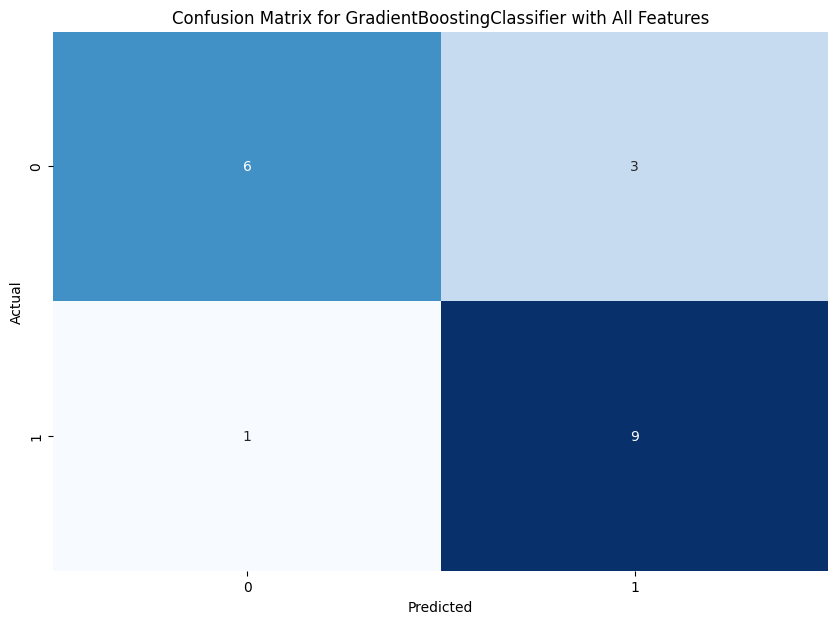


Classification Report for GradientBoostingClassifier with All Features:
              precision    recall  f1-score    support
0              0.857143  0.666667  0.750000   9.000000
1              0.750000  0.900000  0.818182  10.000000
accuracy       0.789474  0.789474  0.789474   0.789474
macro avg      0.803571  0.783333  0.784091  19.000000
weighted avg   0.800752  0.789474  0.785885  19.000000


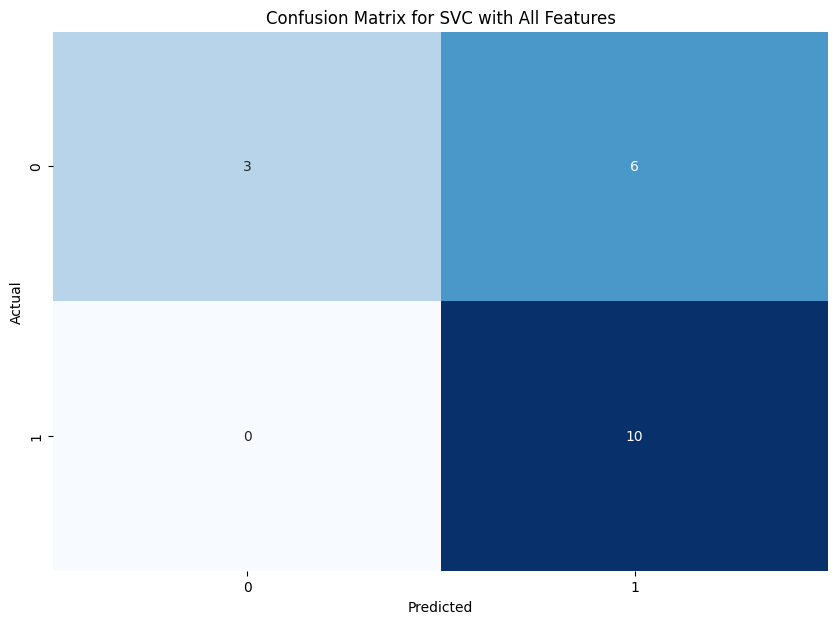


Classification Report for SVC with All Features:
              precision    recall  f1-score    support
0              1.000000  0.333333  0.500000   9.000000
1              0.625000  1.000000  0.769231  10.000000
accuracy       0.684211  0.684211  0.684211   0.684211
macro avg      0.812500  0.666667  0.634615  19.000000
weighted avg   0.802632  0.684211  0.641700  19.000000


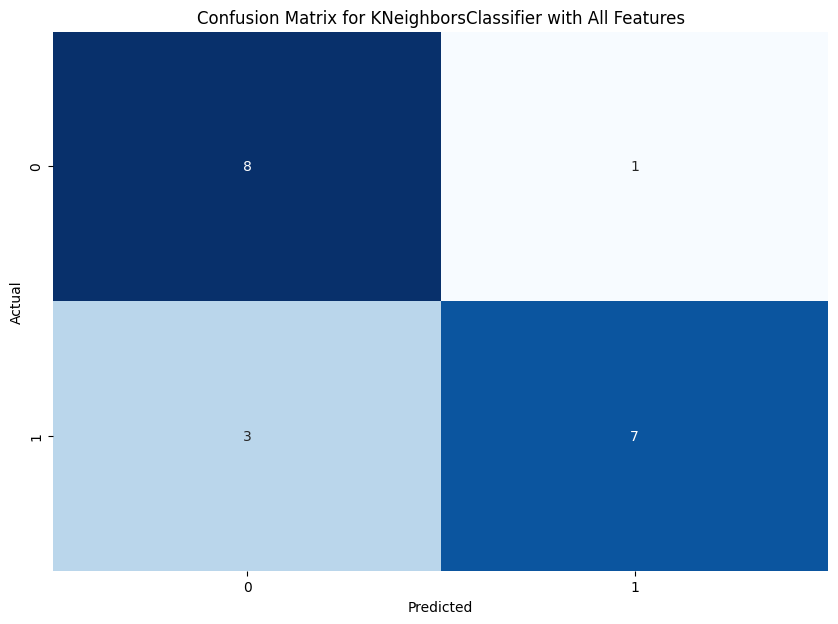


Classification Report for KNeighborsClassifier with All Features:
              precision    recall  f1-score    support
0              0.727273  0.888889  0.800000   9.000000
1              0.875000  0.700000  0.777778  10.000000
accuracy       0.789474  0.789474  0.789474   0.789474
macro avg      0.801136  0.794444  0.788889  19.000000
weighted avg   0.805024  0.789474  0.788304  19.000000


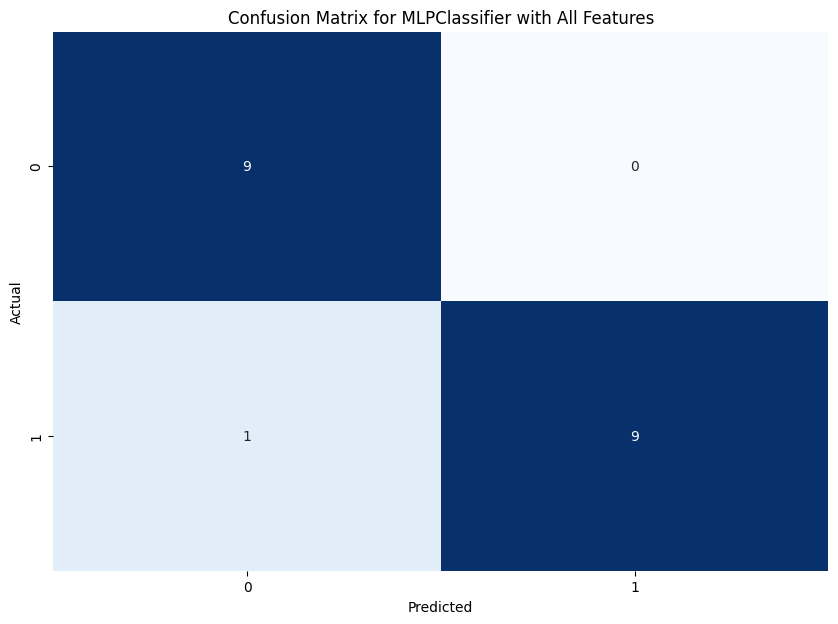


Classification Report for MLPClassifier with All Features:
              precision    recall  f1-score    support
0              0.900000  1.000000  0.947368   9.000000
1              1.000000  0.900000  0.947368  10.000000
accuracy       0.947368  0.947368  0.947368   0.947368
macro avg      0.950000  0.950000  0.947368  19.000000
weighted avg   0.952632  0.947368  0.947368  19.000000


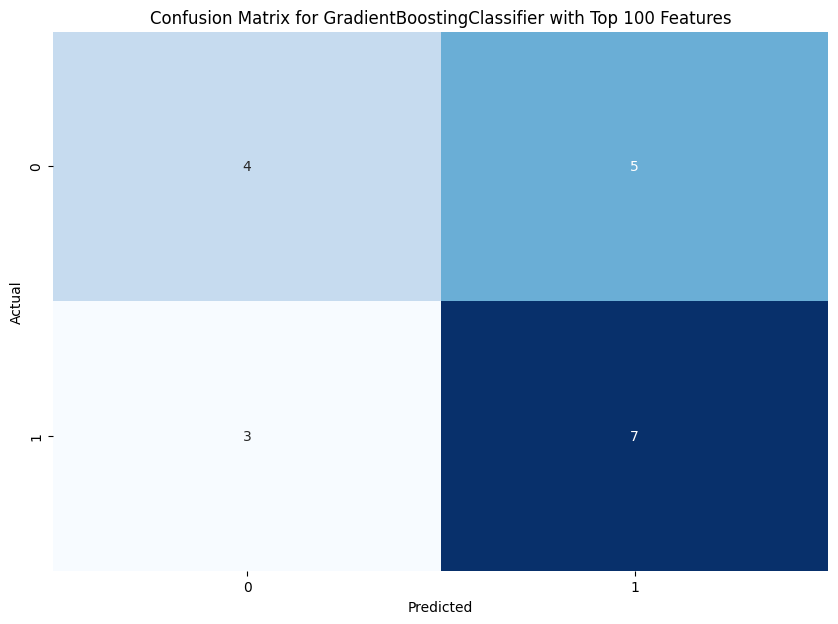


Classification Report for GradientBoostingClassifier with Top 100 Features:
              precision    recall  f1-score    support
0              0.571429  0.444444  0.500000   9.000000
1              0.583333  0.700000  0.636364  10.000000
accuracy       0.578947  0.578947  0.578947   0.578947
macro avg      0.577381  0.572222  0.568182  19.000000
weighted avg   0.577694  0.578947  0.571770  19.000000


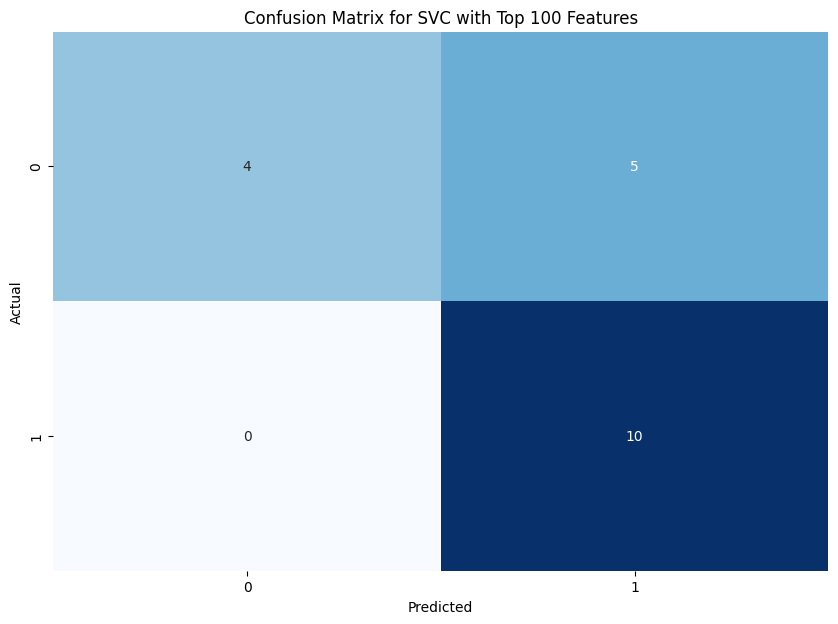


Classification Report for SVC with Top 100 Features:
              precision    recall  f1-score    support
0              1.000000  0.444444  0.615385   9.000000
1              0.666667  1.000000  0.800000  10.000000
accuracy       0.736842  0.736842  0.736842   0.736842
macro avg      0.833333  0.722222  0.707692  19.000000
weighted avg   0.824561  0.736842  0.712551  19.000000


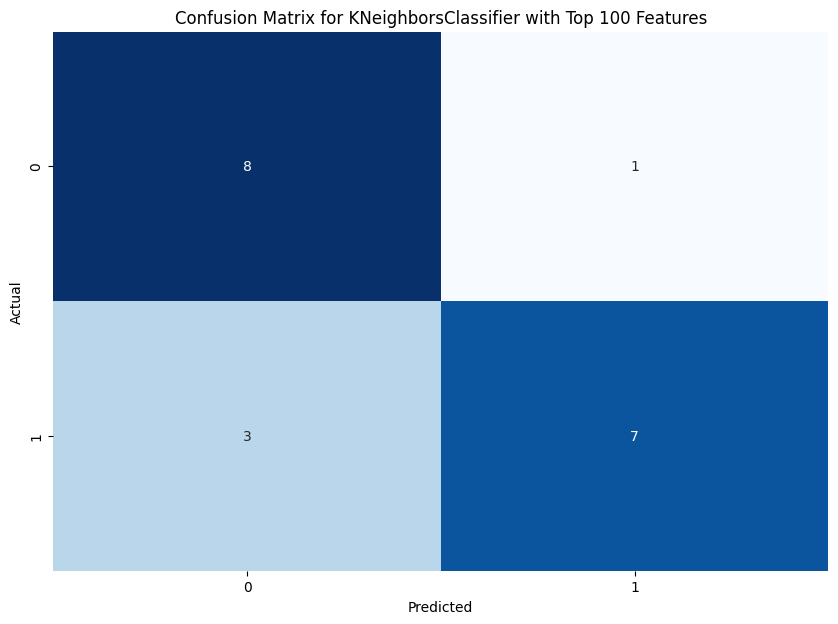


Classification Report for KNeighborsClassifier with Top 100 Features:
              precision    recall  f1-score    support
0              0.727273  0.888889  0.800000   9.000000
1              0.875000  0.700000  0.777778  10.000000
accuracy       0.789474  0.789474  0.789474   0.789474
macro avg      0.801136  0.794444  0.788889  19.000000
weighted avg   0.805024  0.789474  0.788304  19.000000


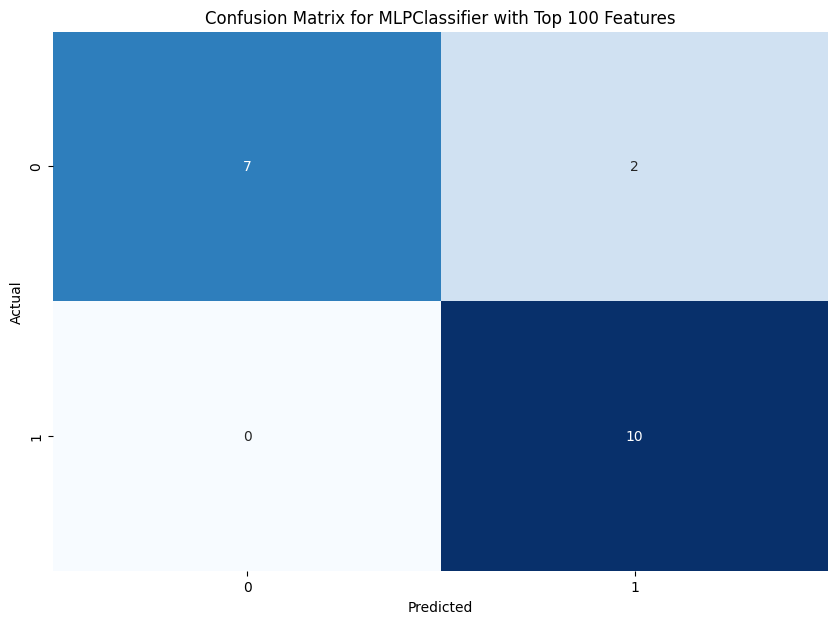


Classification Report for MLPClassifier with Top 100 Features:
              precision    recall  f1-score    support
0              1.000000  0.777778  0.875000   9.000000
1              0.833333  1.000000  0.909091  10.000000
accuracy       0.894737  0.894737  0.894737   0.894737
macro avg      0.916667  0.888889  0.892045  19.000000
weighted avg   0.912281  0.894737  0.892943  19.000000


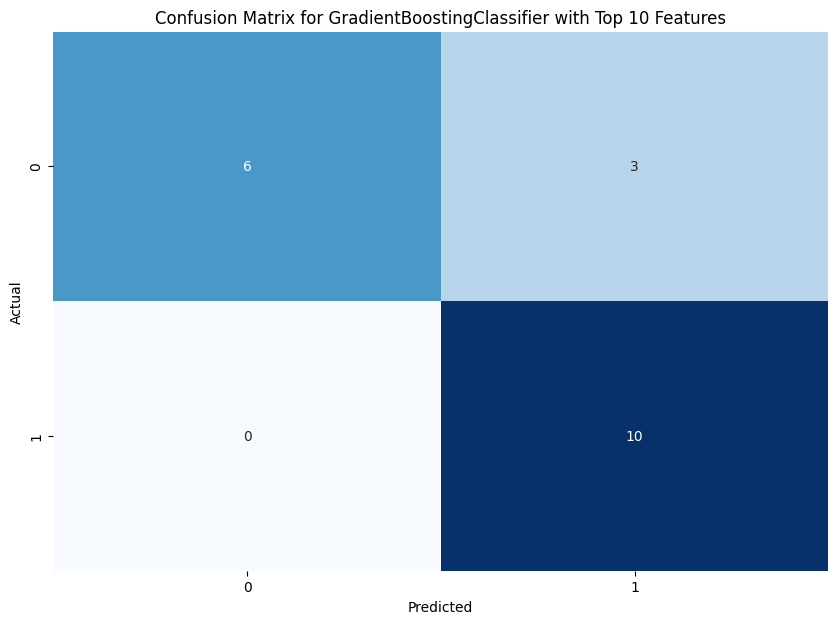


Classification Report for GradientBoostingClassifier with Top 10 Features:
              precision    recall  f1-score    support
0              1.000000  0.666667  0.800000   9.000000
1              0.769231  1.000000  0.869565  10.000000
accuracy       0.842105  0.842105  0.842105   0.842105
macro avg      0.884615  0.833333  0.834783  19.000000
weighted avg   0.878543  0.842105  0.836613  19.000000


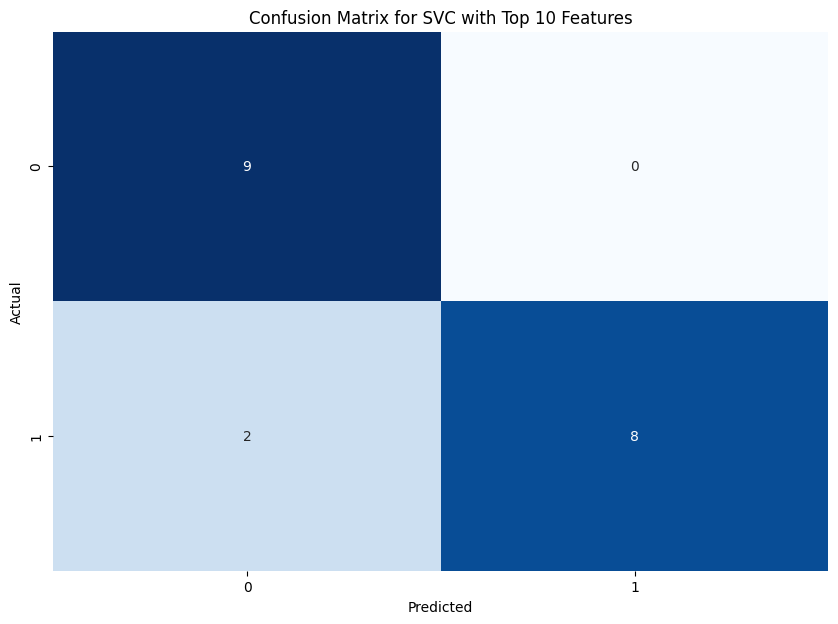


Classification Report for SVC with Top 10 Features:
              precision    recall  f1-score    support
0              0.818182  1.000000  0.900000   9.000000
1              1.000000  0.800000  0.888889  10.000000
accuracy       0.894737  0.894737  0.894737   0.894737
macro avg      0.909091  0.900000  0.894444  19.000000
weighted avg   0.913876  0.894737  0.894152  19.000000


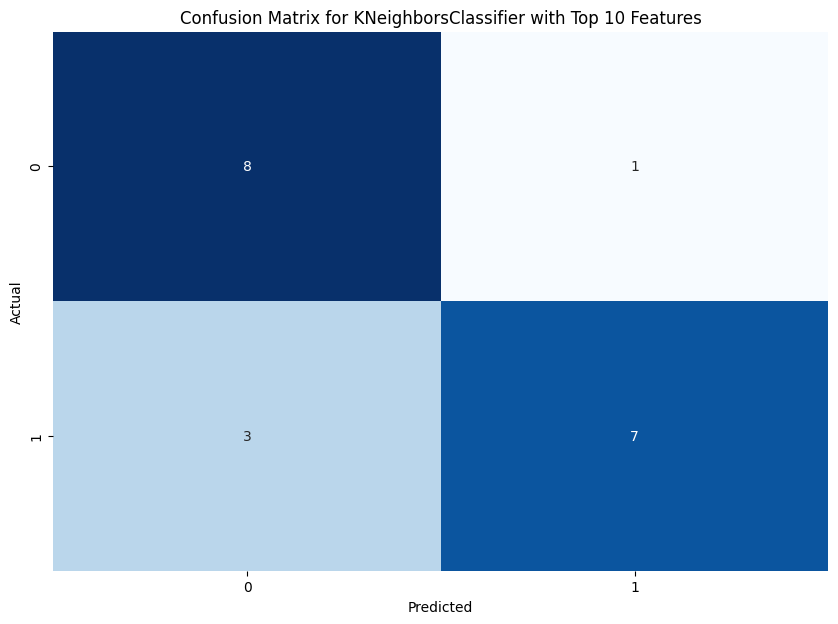


Classification Report for KNeighborsClassifier with Top 10 Features:
              precision    recall  f1-score    support
0              0.727273  0.888889  0.800000   9.000000
1              0.875000  0.700000  0.777778  10.000000
accuracy       0.789474  0.789474  0.789474   0.789474
macro avg      0.801136  0.794444  0.788889  19.000000
weighted avg   0.805024  0.789474  0.788304  19.000000


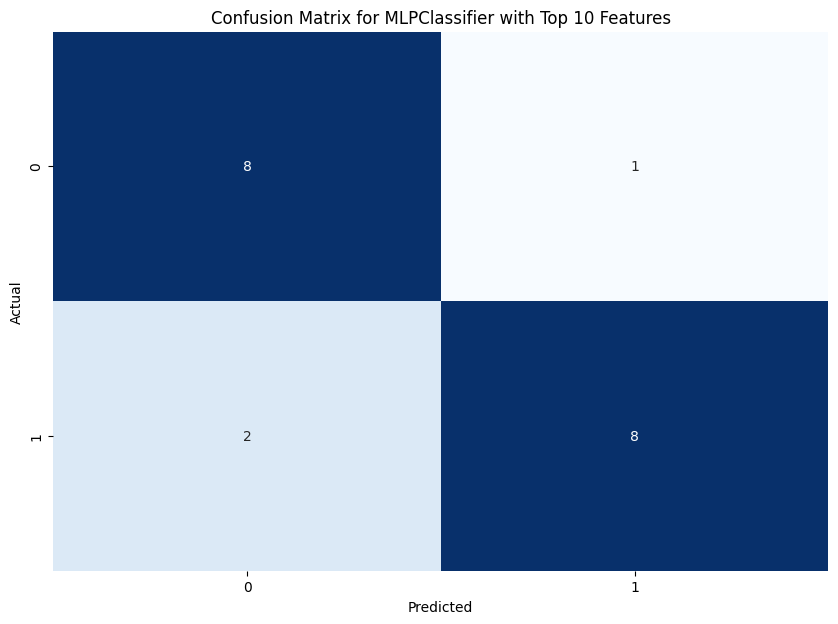


Classification Report for MLPClassifier with Top 10 Features:
              precision    recall  f1-score    support
0              0.800000  0.888889  0.842105   9.000000
1              0.888889  0.800000  0.842105  10.000000
accuracy       0.842105  0.842105  0.842105   0.842105
macro avg      0.844444  0.844444  0.842105  19.000000
weighted avg   0.846784  0.842105  0.842105  19.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use ElasticNet to find feature importances
clf = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = np.abs(clf.coef_)

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

# Define a function to evaluate models and return confusion matrix and classification report
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return cm, report

# Visualization function for confusion matrix
def plot_confusion_matrix(cm, model_name, feature_set):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name} with {feature_set}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to print the classification report
def print_classification_report(report, model_name, feature_set):
    print(f"\nClassification Report for {model_name} with {feature_set}:")
    print(pd.DataFrame(report).transpose())

# Classification with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42)
]

results = {}

for model in models:
    model_name = model.__class__.__name__
    results[model_name] = {}
    cm_all_features, report_all_features = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name]['all_features'] = (cm_all_features, report_all_features)
    plot_confusion_matrix(cm_all_features, model_name, 'All Features')
    print_classification_report(report_all_features, model_name, 'All Features')

# Classification with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    cm_top_100_features, report_top_100_features = evaluate_model(model, X_train_100, X_test_100, y_train_100, y_test_100)
    results[model_name]['top_100_features'] = (cm_top_100_features, report_top_100_features)
    plot_confusion_matrix(cm_top_100_features, model_name, 'Top 100 Features')
    print_classification_report(report_top_100_features, model_name, 'Top 100 Features')

# Classification with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    cm_top_10_features, report_top_10_features = evaluate_model(model, X_train_10, X_test_10, y_train_10, y_test_10)
    results[model_name]['top_10_features'] = (cm_top_10_features, report_top_10_features)
    plot_confusion_matrix(cm_top_10_features, model_name, 'Top 10 Features')
    print_classification_report(report_top_10_features, model_name, 'Top 10 Features')


### GradientBoosting + SVM, KNN, MLP

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load the data
file_path = 'transposed2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Drop the first column (sample names)
df = df.drop(columns=df.columns[0])

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except the last (label)
y = df.iloc[:, -1]   # Last column is the label

# Use Gradient Boosting classifier to find feature importances
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Select the top features
indices_top_100 = np.argsort(importances)[-100:][::-1]  # Sort in descending order
indices_top_10 = np.argsort(importances)[-10:][::-1]    # Sort in descending order

selected_features_top_100 = X.columns[indices_top_100]
selected_features_top_10 = X.columns[indices_top_10]

# Define a function to evaluate models and store results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred, output_dict=True)

# Classification with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42)
]

results = {}

for model in models:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name]['all_features'] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Classification with top 100 features
X_top_100 = df[selected_features_top_100]
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_top_100, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_100_features'] = evaluate_model(model, X_train_100, X_test_100, y_train_100, y_test_100)

# Classification with top 10 features
X_top_10 = df[selected_features_top_10]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

for model in models:
    model_name = model.__class__.__name__
    results[model_name]['top_10_features'] = evaluate_model(model, X_train_10, X_test_10, y_train_10, y_test_10)

# Print all results
for model_name, feature_sets in results.items():
    print(f"\nResults for {model_name}:")
    for feature_set, report in feature_sets.items():
        print(f"\nUsing {feature_set.replace('_', ' ')}:")
        for key, value in report.items():
            print(f"{key}: {value}")



Results for GradientBoostingClassifier:

Using all features:
0: {'precision': 0.8571428571428571, 'recall': 0.6666666666666666, 'f1-score': 0.75, 'support': 9.0}
1: {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 10.0}
accuracy: 0.7894736842105263
macro avg: {'precision': 0.8035714285714286, 'recall': 0.7833333333333333, 'f1-score': 0.7840909090909092, 'support': 19.0}
weighted avg: {'precision': 0.8007518796992481, 'recall': 0.7894736842105263, 'f1-score': 0.7858851674641149, 'support': 19.0}

Using top 100 features:
0: {'precision': 1.0, 'recall': 0.7777777777777778, 'f1-score': 0.875, 'support': 9.0}
1: {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10.0}
accuracy: 0.8947368421052632
macro avg: {'precision': 0.9166666666666667, 'recall': 0.8888888888888888, 'f1-score': 0.8920454545454546, 'support': 19.0}
weighted avg: {'precision': 0.9122807017543861, 'recall': 0.8947368421052632, 'f1-score': 0.892942583732

C:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
